In [1]:
#importing the necessary libraries.
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from wordcloud import WordCloud, STOPWORDS

## DATA READING AND CLEANING

In [2]:
data = pd.read_csv(r"C:\Users\Sarah\Documents\EXTRA CURRICULAR\SHE CODE AFRICA\archive-3\netflix_titles.csv", index_col="show_id")
data.at['s4254','director'] = 'David Slade'
data.at['s718','director'] = 'Evelyn Lewis Prieto'
data["director"].fillna("Unknown", inplace=True) #I filled the NaN values with a chosen string. I used this method because it preserves the variance of the column. Plus, it's quite simple and easy to implement. And seeing as the missing data is a low percentage of the column(about 30%), it gives good results.
data["cast"].fillna("Unknown", inplace=True)
data["country"].fillna("Unknown", inplace=True)
for entry in data["country"]:#trimming each entry in the country column.
    entry = entry.strip()
for entry in data["director"]:
    entry = entry.strip()
for entry in data["cast"]:
    entry = entry.strip()
for entry in data["listed_in"]:
    entry = entry.strip()
data["date_added"] = pd.to_datetime(data["date_added"])
data.at['s6067','date_added'] = pd.to_datetime('September 15, 2014')
data.at['s6175','date_added'] = pd.to_datetime('September 15, 2014')
data.at['s6796','date_added'] = pd.to_datetime('April 6, 2016')
data.at['s6807','date_added'] = pd.to_datetime('January 1, 2015')
data.at['s6902','date_added'] = pd.to_datetime('January 4, 2016')
data.at['s7197','date_added'] = pd.to_datetime('July 6, 2017')
data.at['s7255','date_added'] = pd.to_datetime('June 1, 2015')
data.at['s7407','date_added'] = pd.to_datetime('January 13, 2017')
data.at['s7848','date_added'] = pd.to_datetime('September 15, 2014')
data.at['s8183','date_added'] = pd.to_datetime('September 15, 2014')
data.at['s5542','duration'] = '74 min'
data.at['s5795','duration'] = '84 min'
data.at['s5814','duration'] = '66 min'
data.at['s5814','rating'] = 'TV-MA'
data.at['s5795','rating'] = 'TV-MA'
data.at['s5542','rating'] = 'TV-MA'
#the null values in ratings
data.at['s5990','rating'] = 'TV-PG'
data.at['s6828','rating'] = 'TV-PG'
data.at['s7313','rating'] = 'TV-PG'
data.at['s7538','rating'] = 'TV-MA'
#okay so, while anthony bourdain: parts unknown had 12 seasons in total, only 5 seasons were on NetFlix: season 7-11. This explains why the maker of this datasets inputted 5 seasons instead of 12.
lis_f = []
for val in data["duration"]:
    lis = val.split()
    lis.remove(lis[1])
    lis = ''.join(lis)
    lis_f.append(lis)
data["duration"] = lis_f
data["duration"] = pd.to_numeric(data["duration"])
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## DATA EXPLORATION

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      8807 non-null   object        
 3   cast          8807 non-null   object        
 4   country       8807 non-null   object        
 5   date_added    8807 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8807 non-null   object        
 8   duration      8807 non-null   int64         
 9   listed_in     8807 non-null   object        
 10  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 1.1+ MB


In [4]:
data.corr()

,release_year,duration
release_year,1.000000,-0.249188
duration,-0.249188,1.000000


In [5]:
#checking for null values.
data.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [6]:
data.describe()

,release_year,duration
count,8807.000000,8807.000000
mean,2014.180198,69.848530
std,8.819312,50.806431
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [7]:
#checking for odd values in the type column. It should be just Movies and TV shows.
data["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [8]:
#checking for the number of unique titles.
data["title"].nunique()

8807

#### This shows there are no duplicates as the number of unique titles matches the number of rows in the dataset. Meaning each entry has its own unique title. No two movies or TV shows have the same titles which is correct.

In [9]:
#checking the last rows of the datasets.
data.tail()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [10]:
#checking the number of unique director names. 
data["director"].nunique() 

4530

#### There are duplicates, which makes sense. A director can work on more than one movie/TV show

In [11]:
#checking an example of duplicated director values.
data[data["director"] == "David Fincher"]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s601,Movie,The Game,David Fincher,"Michael Douglas, Sean Penn, Deborah Kara Unger...",United States,2021-07-01,1997,R,129,Thrillers,An aloof investment banker's life spirals into...
s1596,Movie,MANK,David Fincher,"Gary Oldman, Amanda Seyfried, Charles Dance, L...",United States,2020-12-04,2020,R,133,"Dramas, Independent Movies",1930s Hollywood is reevaluated through the eye...
s7702,Movie,Panic Room,David Fincher,"Jodie Foster, Forest Whitaker, Dwight Yoakam, ...",United States,2019-08-01,2002,R,112,Thrillers,A woman and her daughter are caught in a game ...
s8321,Movie,The Girl with the Dragon Tattoo,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","United States, Sweden, Norway",2021-01-05,2011,R,158,"Dramas, Thrillers",When a young computer hacker is tasked with in...
s8512,Movie,The Social Network,David Fincher,"Jesse Eisenberg, Andrew Garfield, Justin Timbe...",United States,2020-04-01,2010,PG-13,121,Dramas,Director David Fincher's biographical drama ch...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."


In [12]:
#checking the number of unique casts.
data["cast"].nunique()

7693

#### There are duplicates, which makes sense because some casts can be reused for a second season of a movie/TV shows.

In [13]:
#checking an example of duplicated cast.
data[data["cast"] == data.at['s8785','cast']] 

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s8784,TV Show,Yoko,Unknown,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",Unknown,2018-06-23,2016,TV-Y,1,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
s8785,Movie,Yoko and His Friends,Unknown,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...","Russia, Spain",2018-06-23,2015,TV-Y,78,Children & Family Movies,"Vik meets new friends in a new city, where the..."


In [14]:
#checking the values in the country column.
data["country"].unique()

array(['United States', 'South Africa', 'Unknown', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, Unit

#### Some entries consist of more than one countries in a single string. Interesting.
#### NOTE: the country column indicates the country where the movie or TV show was produced. The country of production is considered the country of origin. It is the country where the principal offices of the production company or of the individual producer of a moving image work are located.

In [15]:
#checking the values in the date_added column.
data["date_added"].nunique()

1718

#### The column consisted of string values with the dates in 'September 21, 2020' format. I later changed it to datetime format though.
#### Date_added does not necessarily mean the date the movie/TV show was released. It means the date Netflix added it to its platform. Some movies and TV shows were not created by Netflix, but was later added to it. Just keep this in mind.

In [16]:
#checking the unique release years.
sorted(data["release_year"].unique())

[1925,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1954,
 1955,
 1956,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

#### The oldest year is 1925. The most recent is 2021.

In [17]:
#checking the unique ratings.
data["rating"].unique() 

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

#### There were three values belonging to the duration column that were in the rating column. I've assigned the values to the right column and replaced the duration values in the ratings column with their ratings values which I googled.


In [18]:
#checking the unique durations.
data["duration"].unique() 

array([ 90,   2,   1,  91, 125,   9, 104, 127,   4,  67,  94,   5, 161,
        61, 166, 147, 103,  97, 106, 111,   3, 110, 105,  96, 124, 116,
        98,  23, 115, 122,  99,  88, 100,   6, 102,  93,  95,  85,  83,
       113,  13, 182,  48, 145,  87,  92,  80, 117, 128, 119, 143, 114,
       118, 108,  63, 121, 142, 154, 120,  82, 109, 101,  86, 229,  76,
        89, 156, 112, 107, 129, 135, 136, 165, 150, 133,  70,  84, 140,
        78,   7,  64,  59, 139,  69, 148, 189, 141, 130, 138,  81, 132,
        10, 123,  65,  68,  66,  62,  74, 131,  39,  46,  38,   8,  17,
       126, 155, 159, 137,  12, 273,  36,  34,  77,  60,  49,  58,  72,
       204, 212,  25,  73,  29,  47,  32,  35,  71, 149,  33,  15,  54,
       224, 162,  37,  75,  79,  55, 158, 164, 173, 181, 185,  21,  24,
        51, 151,  42,  22, 134, 177,  52,  14,  53,  57,  28,  50,  26,
        45, 171,  27,  44, 146,  20, 157, 203,  41,  30, 194, 233, 237,
       230, 195, 253, 152, 190, 160, 208, 180, 144, 174, 170, 19

#### The datatype is string object. Duration should be in numbers not strings. 
#### So, for the purpose of avoiding the SettingWithCopy warning, I've decided to just scrap the idea of splitting the data into two (movies and Tv shows). Instead, I edited the duration column using a for loop to loop through each value in the column. I then split each iteration in the loop and removed the second item in the resultant list. The .split() function returns a list. Then I converted the list to a string using the string.join(list) function and added each string to an external list. Finally I replaced the values of the duration column with the external list by assigning the list to data["duration"] then called the pd.to_numeric function to convert the values to integers. Just know that movies duration is in minutes and TV shows are in seasons.
#### The code can be seen in the second code cell. The last for loop in the cell.

In [19]:
sorted(data[data["type"] == 'Movie']["duration"])

[3,
 5,
 8,
 9,
 10,
 11,
 11,
 12,
 12,
 12,
 13,
 13,
 13,
 14,
 14,
 14,
 15,
 15,
 15,
 16,
 17,
 17,
 17,
 18,
 19,
 19,
 20,
 20,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 26,
 26,
 26,
 26,
 26,
 26,
 27,
 27,
 27,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 30,
 30,
 30,
 30,
 30,
 30,
 31,
 31,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 33,
 33,
 33,
 33,
 33,
 33,
 34,
 34,
 34,
 35,
 35,
 35,
 35,
 35,
 36,
 36,
 36,
 36,
 36,
 37,
 37,
 37,
 38,
 38,
 38,
 38,
 38,
 39,
 39,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 41,
 41,
 41,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 43,
 44,
 44,
 44,
 44,
 44,

#### I found out a movie has a duration of three minutes. I googled the movie name to be sure it wasn't a mistake. 
#### It is actually three minutes.

In [20]:
#checking the unique values in the listed_in column in case of any anomaly.
data["listed_in"].unique() #no anomaly.

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [21]:
#checking for duplicates in listed_in column.
data["listed_in"].nunique()

514

#### There are duplicates.

In [22]:
#checking unique values in description column.
data["description"].nunique()

8775

In [23]:
#splitting the cleaned data into two (movies and tv shows) before visualizing
movies = data[data["type"] == 'Movie']
tvshow = data[data["type"] == 'TV Show']

# THE BEGINNING OF VISUALIZATION.

### HOW MANY MOVIES AND TV SHOWS ARE ON NETFLIX?
#### WHAT ARE THEIR RELATIVE AMOUNT?

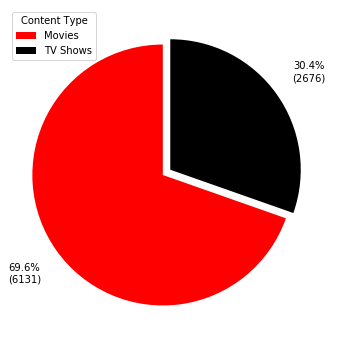

In [24]:
plt.figure(figsize=(14,6))
p = data.groupby("type")["type"].count().values
plt.pie(p,labels=["Movies","TV Shows"],labeldistance=None, startangle=90,explode=[0.07,0],colors=["red","black"],autopct=lambda q: '{:.1f}%\n({:.0f})'.format(q,(q/100)*p.sum()),pctdistance=1.3)
plt.legend(title="Content Type")
plt.show()


#### There are 6131 movies and 2676 TV shows in Netflix. About 70% of Netflix content are movies while a mere 30% are TV shows.

### WHAT IS THE TREND OF MOVIE ADDITION IN NETFLIX OVER THE YEARS?
### DID THEY ADD SHORTER MOVIES OR LONGER MOVIES?

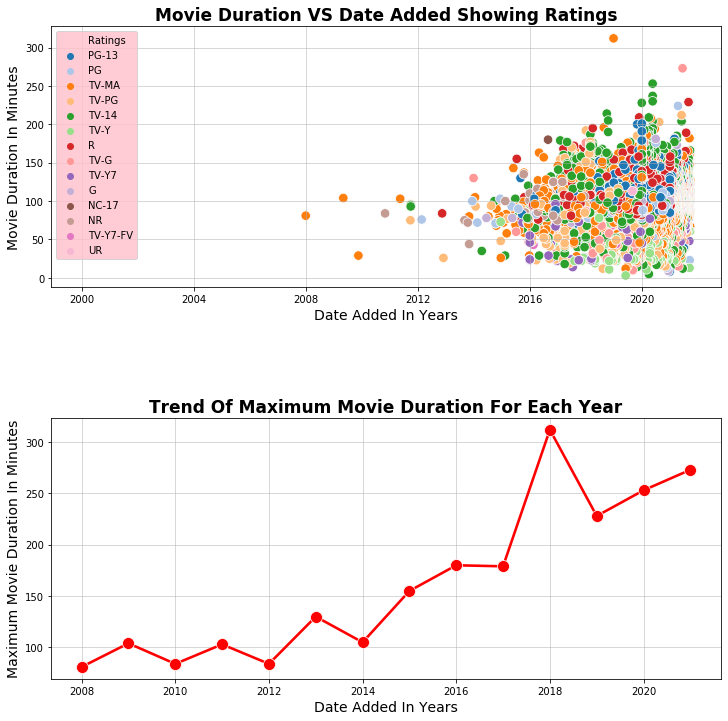

In [25]:
fig = plt.figure(figsize=(12,12))
x = movies["date_added"]
y = movies['duration']
z = movies["rating"]
years = movies["date_added"].dt.year
#first plot
ax = fig.add_subplot(211)
sn.scatterplot(x, y, hue=z,s=90,palette='tab20')
plt.grid(linewidth=0.5, in_layout=False)
plt.xlabel("Date Added In Years", fontsize=14)
plt.ylabel("Movie Duration In Minutes", fontsize= 14)
plt.title("Movie Duration VS Date Added Showing Ratings", fontsize= 17, fontweight='bold')
legend= plt.legend(facecolor='pink')
legend.texts[0].set_text("Ratings")
#second plot
ax2 = fig.add_subplot(212)
max_duration_year = movies.groupby(years)["duration"].max()
sn.lineplot(max_duration_year.index, max_duration_year.values,color='red',marker='o',markersize=12,linewidth=2.6)
plt.grid(linewidth=0.5, in_layout=False)
plt.xlabel("Date Added In Years", fontsize=14)
plt.ylabel("Maximum Movie Duration In Minutes", fontsize= 14)
plt.title("Trend Of Maximum Movie Duration For Each Year", fontsize= 17, fontweight='bold')
plt.subplots_adjust(hspace=0.5)
plt.show()

#### Asides the fact that Netflix added fewer movies in older years (most of the movies were added in more recent years; from 2016-2021), they also added lengthier movies over the years. In 2008, the longest movie ran for less than 100 minutes. The maximum movie duration steadily increases over the years and peaks in 2018 with the longest movie duration being over 300 minutes long(5 hours). In 2021, the longest movie duration is between 250-300 minutes(4 hours 10 minutes- 5 hours).

#### Most movies added in older years (2008-2015) are rated TV-MA (for Mature Adult), but in recent years, we have a lot of TV-14-rated movies (i.e. for 14 years and above). The longest movie is rated TV-MA, second longest is rated TV-G (General Audience).

### HOW IS MOVIE DURATION DISTRIBUTED?

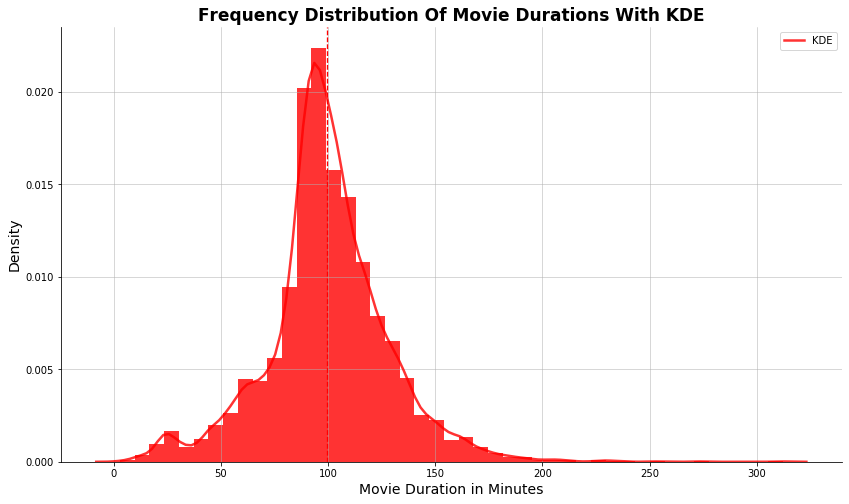

In [26]:
plt.figure(figsize=(14,8))
d = movies["duration"]
dis = sn.distplot(d, bins=45,kde_kws={"color":"r", "lw": 2.5, "label": "KDE","alpha":0.8},hist_kws={"linewidth": 5, "color": "r","alpha":0.8})
plt.xlabel("Movie Duration in Minutes", Fontsize=14)
plt.ylabel("Density", Fontsize=14)
plt.title("Frequency Distribution Of Movie Durations With KDE", Fontsize=17, fontweight='bold')
plt.axvline(d.mean(), ls='--', color='red', lw=1.3)
dis.spines["right"].set_visible(False)
dis.spines["top"].set_visible(False)
plt.grid(linewidth=0.5,in_layout=False)
plt.show()

#### The movie duration seem to be distributed normally with the average movie duration being 100 minutes (1 hour 40 minutes). There are movies that run for less than an hour (60 minutes), and few movies run for more than 2 hours (120 minutes).

### WHAT IS THE MOST COMMON RATING FOR RENEWED TV SHOWS? R?
### WHAT IS THE TREND FOR TV SHOW ADDITION IN NETFLIX?

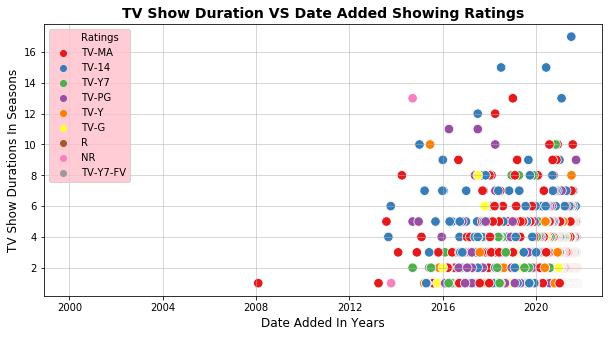

In [27]:
x =  tvshow["date_added"]
y = tvshow["duration"]
z = tvshow["rating"]
fig = plt.figure(figsize=(10,5))
scat = sn.scatterplot(x,y,hue=z,palette='Set1',s=90)
legend= plt.legend(facecolor='pink')
legend.texts[0].set_text("Ratings")
plt.title("TV Show Duration VS Date Added Showing Ratings", fontsize=14,fontweight='bold')
plt.xlabel("Date Added In Years",fontsize=12)
plt.ylabel("TV Show Durations In Seasons",fontsize=12)
plt.grid(linewidth=0.5,in_layout=False)
plt.show()

#### The question I asked myself before plotting this graph was whether the TV shows that got renewed for another season are mostly R rated shows. I wanted to see where people interest lie because one of the factors that influence TV show renewal is popularity among viewers. The answer can be seen in this visualization. Most shows with a high number of seasons (let's say above 10 seasons) are rated TV-14(14 years and above). Two are rated TV-MA(mature adult). Three are rated TV-PG. One is not rated (NR). NR is used if a film has not been submitted for a rating or is an uncut version of a film that was submitted.

#### Another thing that can be inferred from this plot is that most (like 99.9%) of the TV Shows on NetFlix were added between the years 2013 and 2021. Only one show was added in 2008.

### HOW IS TV SHOW DURATION DISTRIBUTED?

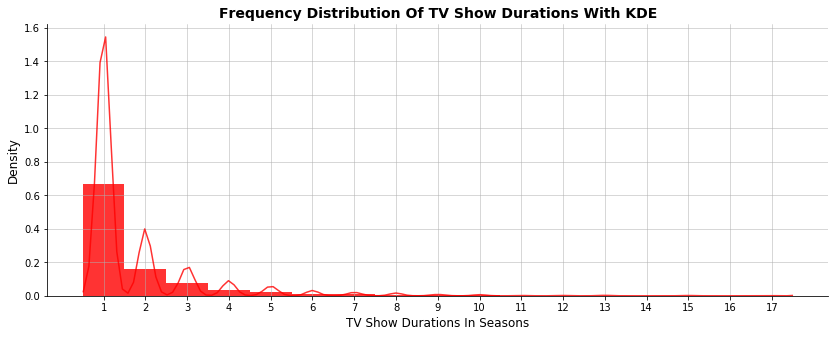

In [28]:
plt.figure(figsize=(14,5))
dis = sn.distplot(y,bins=np.arange(min(y)-0.5,max(y)+1,1),hist_kws={'linewidth':5,'color':'r','alpha':0.8}, kde_kws={'color':'r','alpha':0.8})
plt.xticks(np.arange(min(y), max(y)+1,1))
plt.title("Frequency Distribution Of TV Show Durations With KDE", fontsize=14,fontweight='bold')
plt.xlabel("TV Show Durations In Seasons", fontsize=12)
plt.ylabel("Density",fontsize=12)
dis.spines["top"].set_visible(False)
dis.spines["right"].set_visible(False)
plt.grid(linewidth=0.5,in_layout=False)
plt.show()

#### The distribution is rightly skewed, with most of duration values equal to 1. Meaning most TV Shows had just one season.

### WHICH COUNTRY HAD THE HIGHEST MOVIES AND TV SHOWS PRODUCTION IN IT?

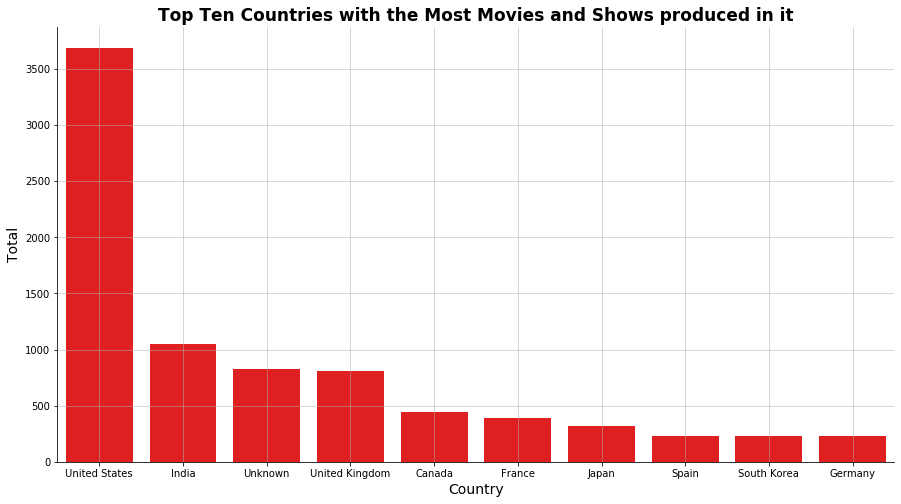

In [29]:
#creating a function that separates the values in a column like country (that has multiple entries in a row) and counts each unique value.
def separate_values(column):
    diction = {} #creating an empty dictionary.
    for entry in column: #iterating through the column
        if ',' in entry:
            for sub_value in entry.split(','): #splitting each iteration if there is a comma present in it.
                sub_value = sub_value.strip() #trimming each split value in the formed list. split() returns a list.
                if sub_value in diction: #checking if the trimmed value is in the dictionary outside the loop. If it's there, the value is increased by one.
                    diction[sub_value] += 1
                else: #adding it to the dictionary with a starting value of one if it is not in the dictionary.
                    diction[sub_value] = 1
        else: #if no comma in the iteration.
            if entry in diction:
                diction[entry] += 1
            else:
                diction[entry] = 1
    return diction
#Editting the country column to plot the values.
dic = separate_values(data['country'])
del dic[''] 
'''for some reason, this empty string is counted as a key when the loop runs. 
I am tired of thinking of why it pops up so I just deleted it instead.'''
#sorting the resultant dictionary in descending order and slicing the first ten elements in the sorted list.
keys = sorted(dic, key=dic.get, reverse=True)[:10] 
val = [dic[i] for i in keys] #retrieving the values for each element in the sliced list.
#plotting keys and val in a bar graph.
plt.figure(figsize=(15,8))
bar = sn.barplot(keys, val, color='red')
plt.title("Top Ten Countries with the Most Movies and Shows produced in it", fontsize=17, fontweight='bold')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Total", fontsize=14)
bar.spines["right"].set_visible(False)
bar.spines["top"].set_visible(False)
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### The category 'Unknown' can be ignored. It represents the previously null values. I left them there to preserve the variance of the data.

#### The country with the highest content production is, unsurprisingly, USA. However, India is the second highest, which is really shocking. One would expect it to be United Kingdom, but India beat the UK in numbers.

### WHAT PERIOD OF THE YEAR DID NETFLIX MOSTLY ADD MOVIES AND TV SHOWS?
#### SPRING, SUMMER, AUTUMN OR WINTER?

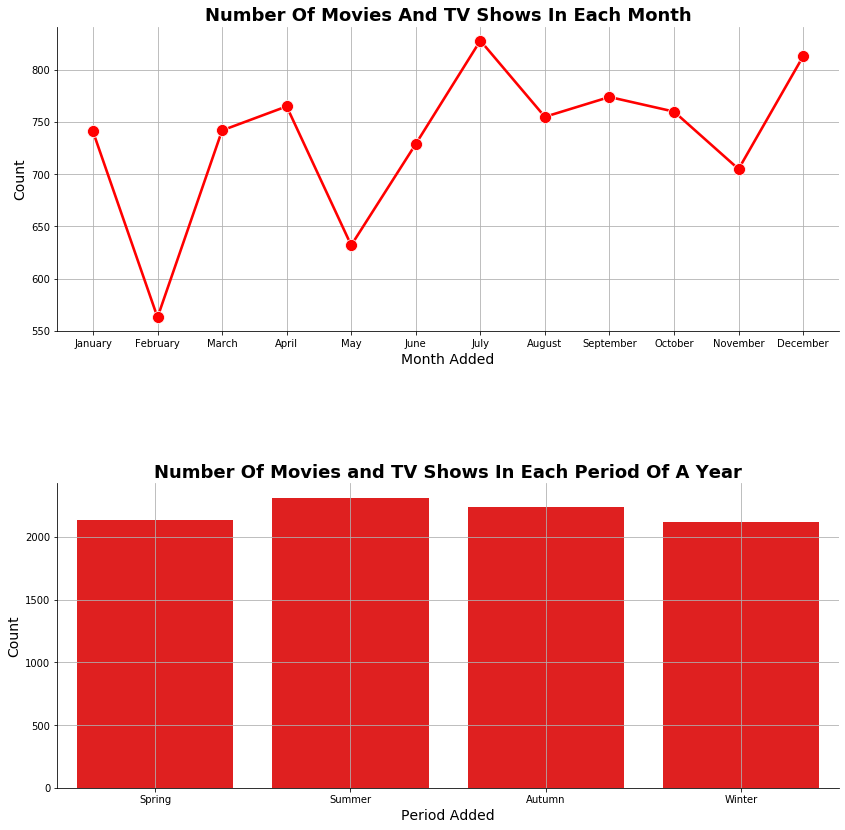

In [30]:
#first, I plotted the number of movies added in each month.
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(2,1,1)
#grouped by month then counted the values for each month
to_plot = data.groupby(data["date_added"].dt.strftime('%B'))["title"].count() 
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
dic2 = {}
for month in months:
    dic2[month] = to_plot.loc[month] #put the count for each month in a dictionary.
x = list(dic2.keys()) #a list of the dictionary keys
y = list(dic2.values()) #a list of the dictionary values
#the first plot
line = sn.lineplot(x,y, sort=False,linewidth=2.6,color='r', marker='o', markersize=12) 
plt.title("Number Of Movies And TV Shows In Each Month", fontsize=18,fontweight='bold')
plt.xlabel("Month Added",fontsize=14)
plt.ylabel("Count",fontsize=14)
line.spines["top"].set_visible(False)
line.spines["right"].set_visible(False)
plt.grid()
#the second plot
ax2 = fig.add_subplot(2,1,2)
spring = dic2["March"] + dic2["April"] + dic2["May"]
summer = dic2["June"] + dic2["July"] + dic2["August"]
autumn = dic2["September"] + dic2["October"] + dic2["November"]
winter = dic2["December"] + dic2["January"] + dic2["February"]
values = [spring,summer,autumn,winter]
period = pd.Series(index=["Spring","Summer","Autumn","Winter"], data=values)
bar = sn.barplot(x = period.index, y= period.values, color='red')
plt.title("Number Of Movies and TV Shows In Each Period Of A Year", fontsize=18,fontweight='bold')
plt.xlabel("Period Added",fontsize=14)
plt.ylabel("Count",fontsize=14)
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
plt.subplots_adjust(hspace=0.5)
plt.grid()
plt.show()


#### Spring period is from March-May. Summer is from June-August. Autumn is from September-November. Winter is from December-February.'''

#### Summer wins by a pretty close call. The month of July had the highest number of content addition; December having the second highest. Users can thus know what period of the year Netflix is most likely to add new movies and TV Shows- Summer. They also know the specific month to look forward to new additions- July.

### WHICH YEAR HAD THE HIGHEST NUMBER OF MOVIES/TV SHOW RELEASE?

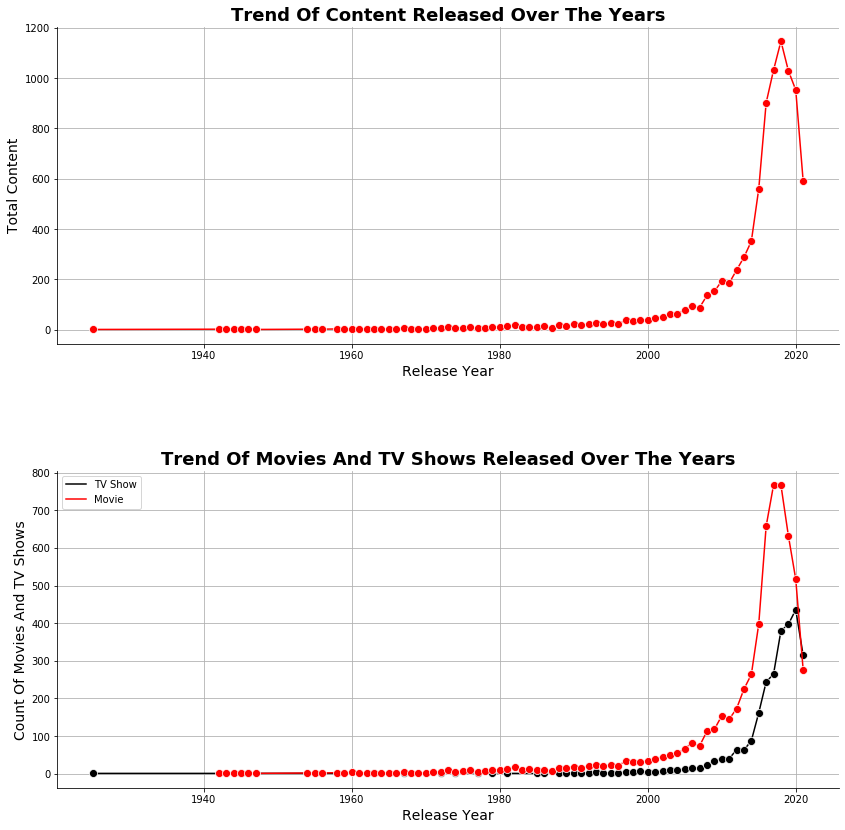

In [31]:
#second plot
grouped = data.groupby(["release_year","type"])["title"].count()
fig = plt.figure(figsize=(14,14))
sub = fig.add_subplot(212)
x = grouped.index.get_level_values("release_year").values
h = grouped.index.get_level_values("type").values
line = sn.lineplot(x,grouped.values, hue=h, marker='o',palette=['k','r'],markersize=8)
plt.title("Trend Of Movies And TV Shows Released Over The Years", fontsize=18,fontweight='bold')
plt.xlabel("Release Year",fontsize=14)
plt.ylabel("Count Of Movies And TV Shows",fontsize=14)
line.spines["top"].set_visible(False)
line.spines["right"].set_visible(False)
plt.grid()
#first plot
grouped2 = data.groupby("release_year")["title"].count()
sub2 = fig.add_subplot(211)
line2 = sn.lineplot(grouped2.index,grouped2.values, marker='o',color='red',markersize=8)
plt.title("Trend Of Content Released Over The Years", fontsize=18,fontweight='bold')
plt.xlabel("Release Year",fontsize=14)
plt.ylabel("Total Content",fontsize=14)
line2.spines["top"].set_visible(False)
line2.spines["right"].set_visible(False)
plt.grid()
plt.subplots_adjust(hspace=0.4)
plt.show()


#### The total content count increased over the years and then noticeably decreased from 2018-2021. This could be due to the advent of COVID-19 and the restrictions that were placed during these years.
#### The year with the highest number of content release (i.e. both Movie and TV Show release) was 2018. Most years had just one Movie/TV Shows released in them and theses were the older years (before 2000). From around year 2000 and above, the numbers increased gradually. Close to 600 movies and shows were released last year.

#### The count of movies released followed a similar trend as in the first plot. However, two years share the highest position in this graph- 2017 and 2018.
#### Both years had the same number of movies released- 767. However, from the first plot, we see that 2018 had the highest number of total content released. This shows that 2018 had a higher number of TV shows than 2017. 

#### Lastly, the count of TV shows released show a different trend. The numbers start to increase around year 2010 and peaks at year 2020. Generally, more movies were released compared to TV shows (there are more movies than TV shows in the dataset).

In [32]:
grouped.sort_values(ascending=False)

release_year  type   
2017          Movie      767
2018          Movie      767
2016          Movie      658
2019          Movie      633
2020          Movie      517
                        ... 
1972          TV Show      1
1963          Movie        1
              TV Show      1
1989          TV Show      1
1925          TV Show      1
Name: title, Length: 119, dtype: int64

### WHICH DIRECTOR HAD THE HIGHEST COUNT OF MOVIES AND TV SHOWS?

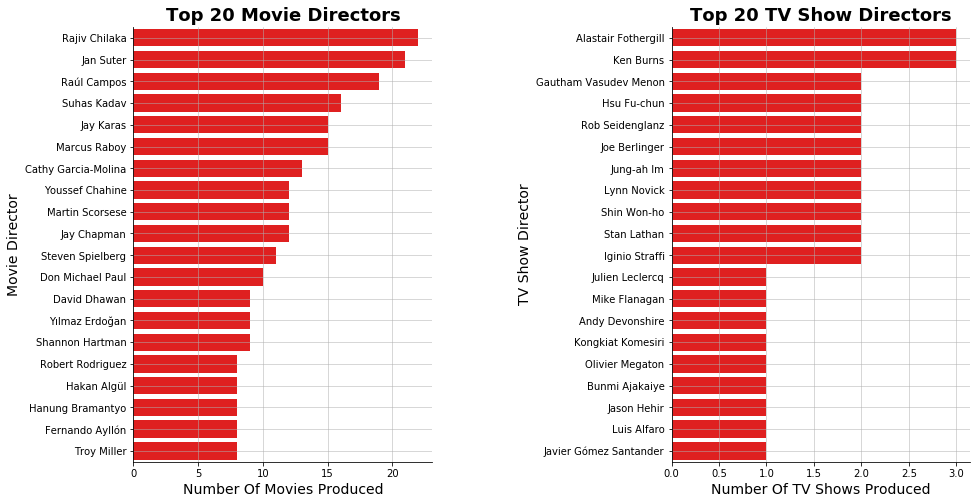

In [33]:
#separating the values in the movies director column.
m_dic = separate_values(movies["director"])
m_keys = sorted(m_dic,key=m_dic.get,reverse=True)[1:21]
m_val = [m_dic[i] for i in m_keys]
#plotting the first bar plot
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
bars = sn.barplot(m_val,m_keys, color='red')
plt.title("Top 20 Movie Directors", fontsize=18, fontweight='bold')
plt.xlabel("Number Of Movies Produced", fontsize=14)
plt.ylabel("Movie Director", fontsize=14)
bars.spines["top"].set_visible(False)
bars.spines["right"].set_visible(False)
plt.grid(linewidth=0.5, in_layout=False)
#separating the values in the tvshow director column.
t_dic = separate_values(tvshow["director"])
t_keys = sorted(t_dic,key=t_dic.get, reverse=True)[1:21]
t_val = [t_dic[i] for i in t_keys]
#plotting the second bar plot
ax2 = fig.add_subplot(122)
bars2 = sn.barplot(t_val,t_keys,color='red')
plt.title("Top 20 TV Show Directors",fontsize=18,fontweight='bold')
plt.xlabel("Number Of TV Shows Produced",fontsize=14)
plt.ylabel("TV Show Director",fontsize=14)
bars2.spines["top"].set_visible(False)
bars2.spines["right"].set_visible(False)
plt.subplots_adjust(wspace=0.8)
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### According to a Google search, the most popular netflix movie director is Martin Scorsese. While one may think he will also have the highest number of Netflix movies, we can see from the graph below that this is not the case. Rajiv Chilaka, an animator has the highest number of movies (more than 20 movies). Martin Scorsese has the nineth highest number on the list (less than 15 movies).

#### Alastair Fothergill and Ken Burns have the highest TV Show count (they have both directed 3 TV shows).

### WHICH DIRECTOR(S) MADE THE LONGEST MOVIES?

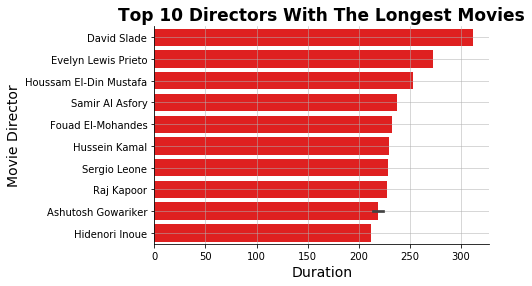

In [34]:
duration = movies.sort_values(by="duration",ascending=False)[:11]
bar = sn.barplot(duration["duration"],duration["director"],color='red')
plt.title("Top 10 Directors With The Longest Movies",fontsize=17,fontweight='bold')
plt.xlabel("Duration",fontsize=14)
plt.ylabel("Movie Director",fontsize=14)
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### David Slade directed the longest movie. Houssam El-Din Mustafa (an Egyptian) is the first african on the ranked list.

### MOST USED WORDS IN MOVIE/TV SHOW DESCRIPTION?

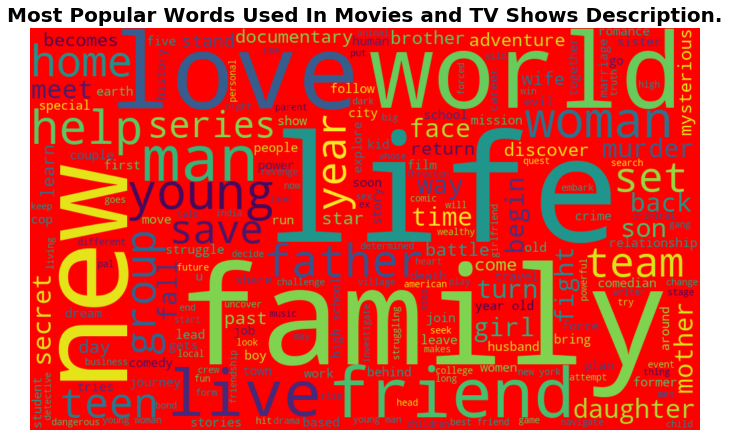

In [35]:
#setting the stopwords 
'''Stopwords are common words in a sentence that don't add meaning to the sentence (e.g. and, he, she etc). 
STOPWORDS is the default set of stopwords created by python.'''
stop_words = STOPWORDS.update(["take","find","one","two","three","four","takes","must","become","finds","S","make"]) 
#preparing the description column for visualization.
description_words = ''
values = data["description"].values #this is an array object of the entries in the description column.
for val in values:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    description_words += ' '.join(tokens)+' ' #putting every word in description column in a single string.
#plotting the wordcloud
plt.figure(figsize=(12,8))
wc = WordCloud(width=1000, height=600, background_color="red",min_font_size=10,stopwords=stop_words)
wc.generate(description_words)
plt.imshow(wc.recolor(random_state=17), interpolation='bilinear')
plt.axis("off")
plt.title("Most Popular Words Used In Movies and TV Shows Description.",fontsize=20,fontweight='bold')
plt.show()

#### The most popular words are family, world, love, life, new, friend, secret, young, etc.

### WHICH RATING HAD THE HIGHEST COUNT OF MOVIES AND TV SHOWS?

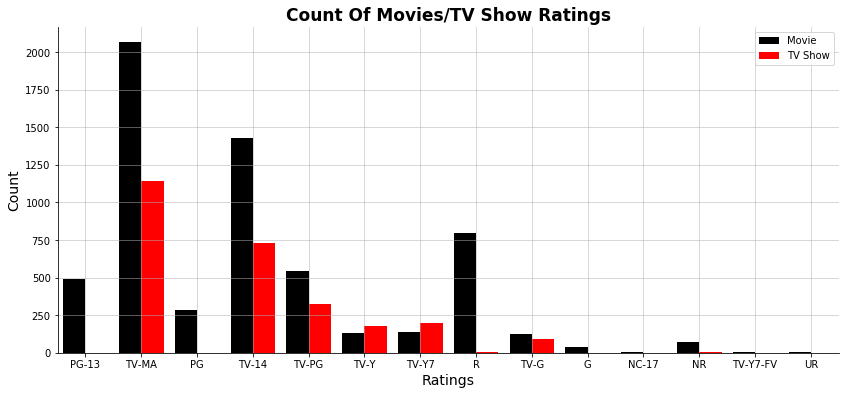

In [36]:
plt.figure(figsize=(14,6))
count = sn.countplot("rating",data=data,hue="type",palette=['k','r'],saturation=1)
plt.title("Count Of Movies/TV Show Ratings", fontsize=17,fontweight='bold')
plt.xlabel("Ratings",fontsize=14)
plt.ylabel("Count",fontsize=14)
count.spines["top"].set_visible(False)
count.spines["right"].set_visible(False)
plt.legend(loc='upper right')
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### TV-MA (Mature Adult) has the highest count for both movies and TV shows. This means most content on Netflix are rated for mature audiences. This agrees with the two scatterplot drawn above. In those scatterplots, it can be observed that TV-MA has a lot of data points.
#### Also, the second most common rating for movies is TV-14 (for 14 years old and above), followed by R. For TV shows, the second most common rating is also TV-14 but R -unlike for movies- has a very low count. We have more R-rated movies than R-rated TV shows on Netflix. The third most common rating for TV Shows is TV-PG (parental guidance is recommended).
#### No TV Show has following ratings; PG-13, PG, G (General audiences), NC-17, TV-Y7-FV and UR.

### WHICH ACTOR/ACTRESS APPEARED IN THE HIGHEST NUMBER OF NETFLIX MOVIES?

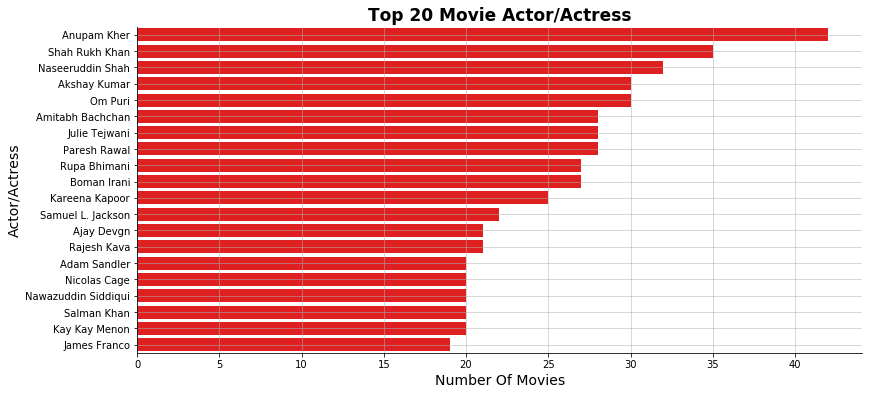

In [37]:
#separating the values in the movies cast column
m_act = separate_values(movies["cast"])
m_act_k = sorted(m_act,key=m_act.get, reverse=True)[1:21]
m_act_v = [m_act[i] for i in m_act_k]
#plotting the graph
plt.figure(figsize=(13,6))
bar = sn.barplot(m_act_v,m_act_k,color='red')
plt.title("Top 20 Movie Actor/Actress", fontsize=17,fontweight='bold')
plt.xlabel("Number Of Movies",fontsize=14)
plt.ylabel("Actor/Actress",fontsize=14)
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### Anupam Kher, an Indian actor, has appeared in the most Netflix movies. He has appeared in over 40 Netflix movies. Shah Rukh Khan comes second and is also an Indian actor.  Most people on this ranked list are Indians. The first eleven actor/actress on the list are Indians. The first non-Indian to appear on the list is Samuel L. Jackson, an American actor. He has appeared in about 20 Netflix movies. He, Adam Sandler, Nicolas Cage and James Franco appear to be the only americans on the list. The rest are Indians.

#### The first actress to appear on the list is Julie Tejwani, a voice actress (also from India). She comes seventh on the list. Julie Tejwani, Rupa Bhimani and Kareena Kapoor are the only actresses on the list, two of whom are voice actresses (Julie and Rupa).

### WHICH ACTOR/ACTRESS APPEARED IN THE HIGHEST NUMBER OF NETFLIX TV SHOWS?

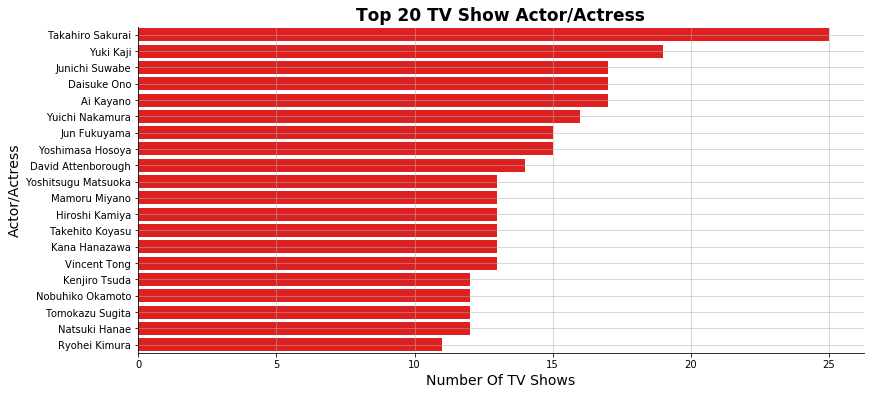

In [38]:
#separating the values in the tvshow cast column
t_act = separate_values(tvshow["cast"])
t_act_k = sorted(t_act,key=t_act.get, reverse=True)[1:21]
t_act_v = [t_act[i] for i in t_act_k]
#plotting the bar plot
plt.figure(figsize=(13,6))
bar = sn.barplot(t_act_v,t_act_k,color='red')
plt.title("Top 20 TV Show Actor/Actress",fontsize=17,fontweight='bold')
plt.xlabel("Number Of TV Shows", fontsize=14)
plt.ylabel("Actor/Actress",fontsize=14)
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### Takahiro Sakurai, a Japanese voice actor, narrator and radio personality, has appeared in the most Netflix TV shows. Yuki Kaji, also a Japanese voice actor, has appeared in the second highest number of Netflix TV shows. The first eight people on the list are Japanese voice actor/actress, appearing mostly in cartoons and anime. The first non-Japanese to appear on the list is David Attenborough, an American broadcaster. He comes ninth on the list. Hiroshi Kamiya, a popular Japanese voice actor (appearing in a popular anime series: Attack On Titan) comes twelveth on the list. He appears in about 13 Netflix TV shows.

#### Vincent Tong is the first Canadian to appear on the list, coming fifteenth. He is also a voice actor. He and David Attenborough are the only non-Japanese to appear on the list. The rest are Japanese. Most of the people on this list are voice actor/actress.

#### The first actress to appear on the list is Ai Kayano, a Japanese voice actress. She and Kana Hanazawa are the only actresses on this list.

### WHICH ACTOR/ACTRESS APPEARED IN THE LEAST NUMBER OF MOVIES?

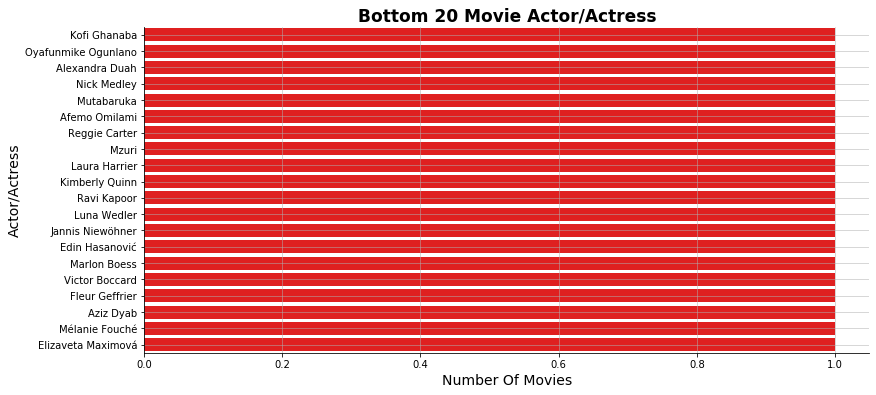

In [39]:
m_act_kl = sorted(m_act,key=m_act.get)[:20]
m_act_vl = [m_act[i] for i in m_act_kl]
#plotting the graph
plt.figure(figsize=(13,6))
bar = sn.barplot(m_act_vl,m_act_kl,color='red')
plt.title("Bottom 20 Movie Actor/Actress", fontsize=17,fontweight='bold')
plt.xlabel("Number Of Movies",fontsize=14)
plt.ylabel("Actor/Actress",fontsize=14)
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### All actors/actresses in this list appeared in just one Netflix movie. We have a mix of Nigerian, Ghanian, Jamacian, American, Swiss, French, British, Czech etc actors/actresses in this list. There is no Indian except Ravi Kapoor, who is British but of Indian heritage.

### WHICH ACTOR/ACTRESS APPEARED IN THE LEAST NUMBER OF NETFLIX TV SHOWS?

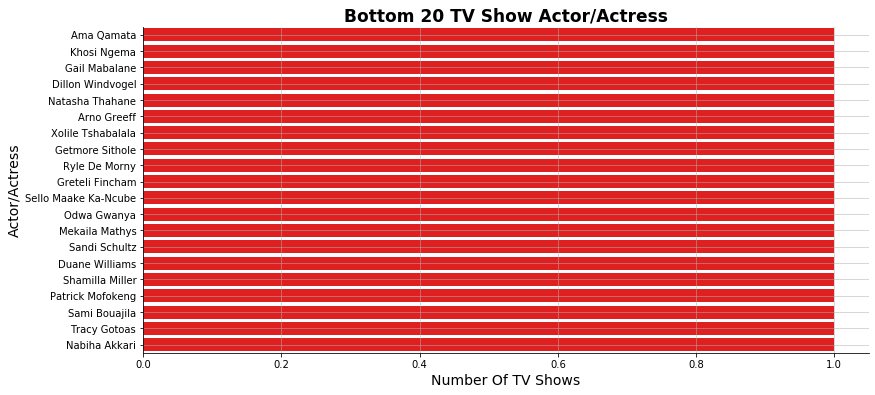

In [40]:
t_act_kl = sorted(t_act,key=t_act.get)[:20]
t_act_vl = [t_act[i] for i in t_act_kl]
#plotting the bar plot
plt.figure(figsize=(13,6))
bar = sn.barplot(t_act_vl,t_act_kl,color='red')
plt.title("Bottom 20 TV Show Actor/Actress",fontsize=17,fontweight='bold')
plt.xlabel("Number Of TV Shows", fontsize=14)
plt.ylabel("Actor/Actress",fontsize=14)
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### All actors and actresses in this list have only appeared in one Netflix TV Show. Most of the people on this list are South African actors/actresses. The first non-South African to pop up is Sami Bouajila, a French actor. He, Tracy Gotoas and Nabiha Akkari are the only three non-South African on this list and are all French.

### WHAT IS THE MOST POPULAR CATEGORY FOR MOVIES ON NETFLIX?

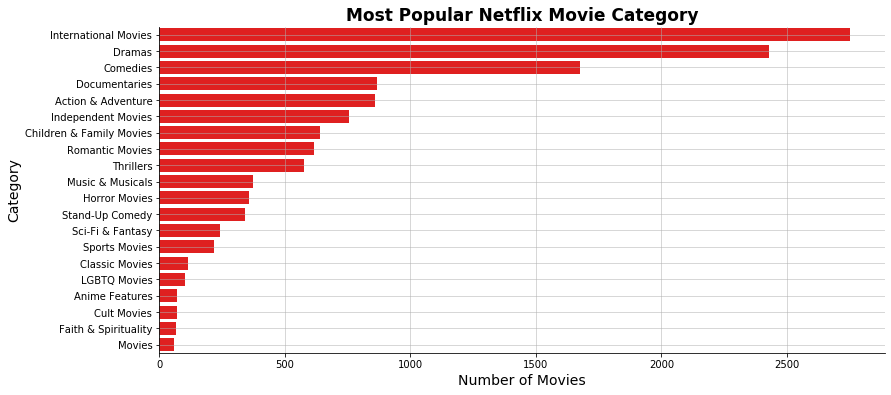

In [41]:
#separating and counting each category in the listed_in column
m_listed = separate_values(movies["listed_in"])
m_listed_k = sorted(m_listed,key=m_listed.get, reverse=True)
m_listed_v = [m_listed[i] for i in m_listed_k]
#plotting the graph
plt.figure(figsize=(13,6))
bar = sn.barplot(m_listed_v,m_listed_k, color='red')
plt.title("Most Popular Netflix Movie Category",fontsize=17,fontweight='bold')
plt.xlabel("Number of Movies",fontsize=14)
plt.ylabel("Category",fontsize=14)
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### We have over 2500 movies listed in the International Movies category.

### WHAT IS THE MOST POPULAR CATEGORY FOR TV SHOWS ON NETFLIX?

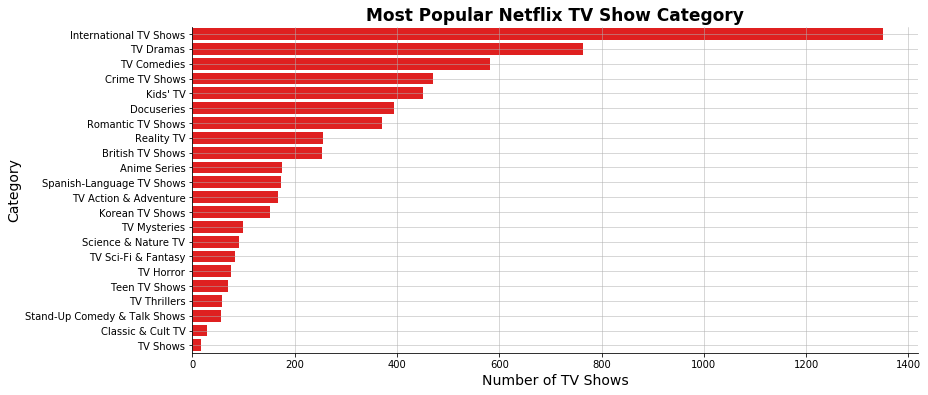

In [42]:
#separating and counting each category in the listed_in column
t_listed = separate_values(tvshow["listed_in"])
t_listed_k = sorted(t_listed,key=t_listed.get, reverse=True)
t_listed_v = [t_listed[i] for i in t_listed_k]
#plotting the graph
plt.figure(figsize=(13,6))
bar = sn.barplot(t_listed_v,t_listed_k, color='red')
plt.title("Most Popular Netflix TV Show Category",fontsize=17,fontweight='bold')
plt.xlabel("Number of TV Shows",fontsize=14)
plt.ylabel("Category",fontsize=14)
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### There are more than 1200 TV Shows listed in the International TV Shows category.

### WHAT ARE THE CATEGORIES OF THE LONGEST MOVIES?

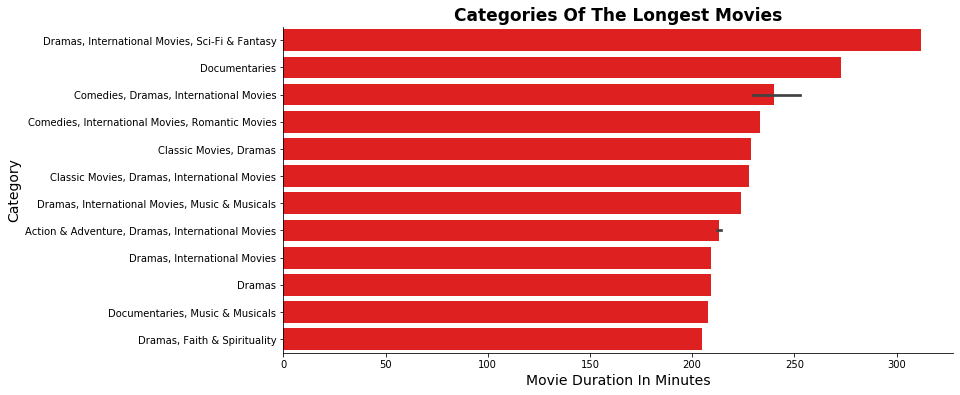

In [43]:
mini_df = movies[["duration","listed_in"]].sort_values(by="duration",ascending=False)[:15]
plt.figure(figsize=(12,6))
plot = sn.barplot(mini_df["duration"],mini_df["listed_in"],color='red')
plt.title("Categories Of The Longest Movies",fontsize=17,fontweight='bold')
plt.xlabel("Movie Duration In Minutes",fontsize=14)
plt.ylabel("Category",fontsize=14)
plot.spines["top"].set_visible(False)
plot.spines["right"].set_visible(False)
plt.show()

#### Most people would expect the longest movie to be a documentary, because documentaries are known to be very long. But, the longest movie is actually listed in the Dramas, International Movies, Sci-Fi and Fantasy categories. 
#### However, the second longest movie is listed in the Documentaries category. Most of the longest movies are listed in the Dramas category.

### WHAT ARE THE CATEGORIES FOR THE LONGEST TV SHOWS?

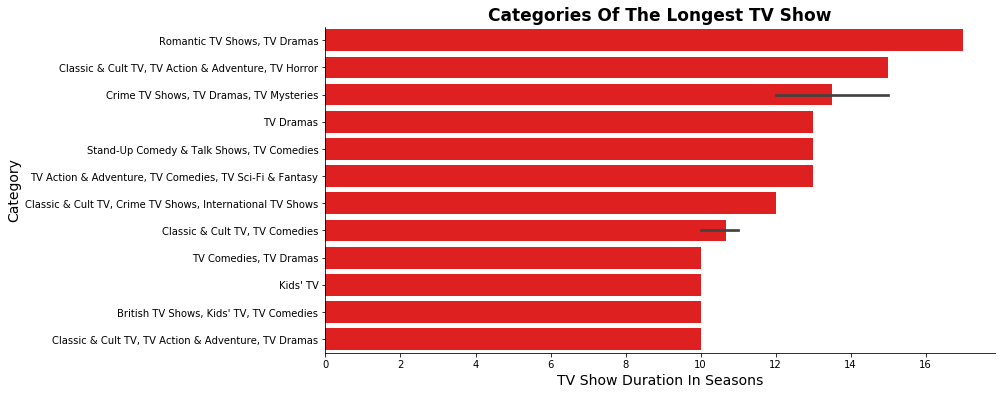

In [44]:
mini_df2 = tvshow[["duration","listed_in"]].sort_values("duration",ascending=False)[:15]
plt.figure(figsize=(12,6))
plot2 = sn.barplot(mini_df2["duration"],mini_df2["listed_in"],color='red')
plt.title("Categories Of The Longest TV Show",fontsize=17,fontweight='bold')
plt.xlabel("TV Show Duration In Seasons",fontsize=14)
plt.ylabel("Category",fontsize=14)
plot2.spines["top"].set_visible(False)
plot2.spines["right"].set_visible(False)
plt.show()

#### The longest TV Show is listed in the Romantic TV Shows and TV Dramas categories, having 17 seasons.